# Surprise Housing

## Business Objective

A US-based housing company named Surprise Housing has decided to enter the Australian market. 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house

### Importing Libraries

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import datetime

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

### Data Understanding and Cleaning

In [2]:
#reading the csv file and printing its shape
df = pd.read_csv('train.csv')
print(df.shape)

(1460, 81)


In [3]:
#Let's have a quick look at the data
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Some statistical insights
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Plotting the Lot Area Distribution

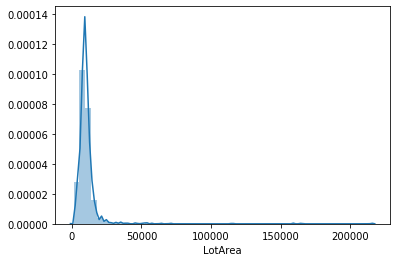

In [5]:
sns.distplot(df['LotArea'])
plt.show()

##### Plotting the Sale Price Vs Overall Quality of House

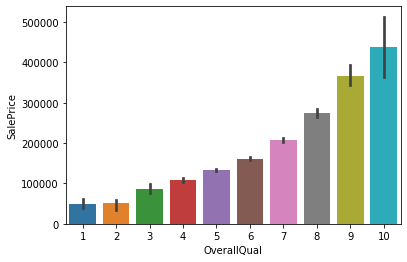

In [6]:
sns.barplot(df['OverallQual'],df['SalePrice'])
plt.show()

##### Plotting the Sale Price Vs Overall Condition of House

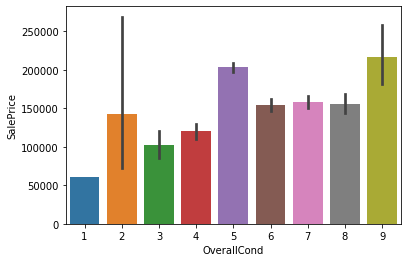

In [7]:
sns.barplot(df['OverallCond'],df['SalePrice'])
plt.show()

#### Thus based on the following plots :
    1) Sale Price Increases with the Overall Quality of the House.
    2) Sale Price is independent of Overall Condition of the House and also depends on many other features.

##### Plotting the Sale Price Distribution

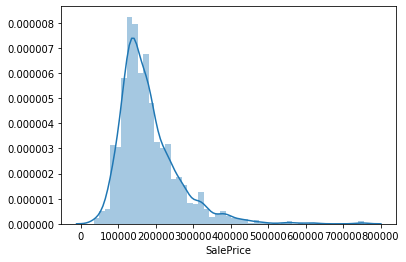

In [8]:
#Let's visualize the distribution of sale price
sns.distplot(df['SalePrice'])

In [9]:
#'Id' is just an identifier with no predictive power. So let's drop the column
df.drop('Id', axis = 1, inplace = True)
print(df.shape)

(1460, 80)


In [10]:
#percentage of null values (non zero) in differend columns
col_list = list(df)
null = []
for i in df.isnull().sum()*100/df.shape[0]:
    null.append(i)
data = {'columns': col_list, '% Null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% Null'] != 0]

,columns,% Null
2,LotFrontage,17.739726
5,Alley,93.767123
24,MasVnrType,0.547945
25,MasVnrArea,0.547945
29,BsmtQual,2.534247
30,BsmtCond,2.534247
31,BsmtExposure,2.602740
32,BsmtFinType1,2.534247
34,BsmtFinType2,2.602740
41,Electrical,0.068493


In [11]:
#'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns are with very high number of nan values. Let's drop the columns
dropped = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print('Data Left After Dropping:', dropped.shape)

Data Left After Dropping: (1460, 76)


In [12]:
#identify numerical and non-numerical columns automatically
CatCols = []
NumCols = []

for col in list(dropped):
    if dropped[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',CatCols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclose

In [13]:
#Checking how many unique values are there in each of the categorical column
value_counts = []
for col in CatCols:
    value_counts.append(len(dropped[col].value_counts()))
data_val = {'cat_col': CatCols, 'value_counts': value_counts}
pd.DataFrame(data_val)

,cat_col,value_counts
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


In [14]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    dropped[col].fillna('No Garage', inplace=True)
dropped['GarageYrBlt'].fillna(0, inplace=True)

In [15]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'. So replacing NANs with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    dropped[col].fillna('No Basement', inplace=True)

In [16]:
#rechecking percentage of null values (non zero) in differend columns
col_list = list(dropped)
null = []
for i in dropped.isnull().sum()*100/dropped.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,LotFrontage,17.739726
23,MasVnrType,0.547945
24,MasVnrArea,0.547945
40,Electrical,0.068493
55,FireplaceQu,47.260274


In [17]:
#Unique values in 'FireplaceQu'
dropped['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
#Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'
dropped['FireplaceQu'].fillna('No Fireplace', inplace=True)

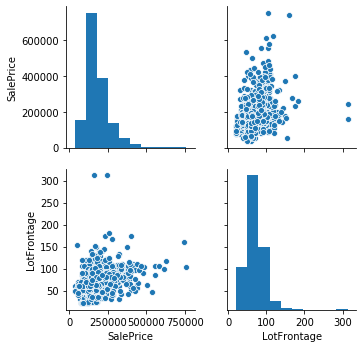

In [19]:
#Let's see how important the 'LotFrontage' column is
sns.pairplot(dropped[['SalePrice','LotFrontage']])

#### Based on the plots, LotFrontage is an important column. Replacing the missing values of LotFrontage with Mean value of LotFrontage.

In [20]:
dropped.loc[:,'LotFrontage'] = dropped.loc[:, 'LotFrontage'].fillna(dropped['LotFrontage'].mean())

In [21]:
dropped.dropna(inplace = True)

##### Thus, Now no variables are left with missing values.

In [22]:
dropped.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Correlation Plot

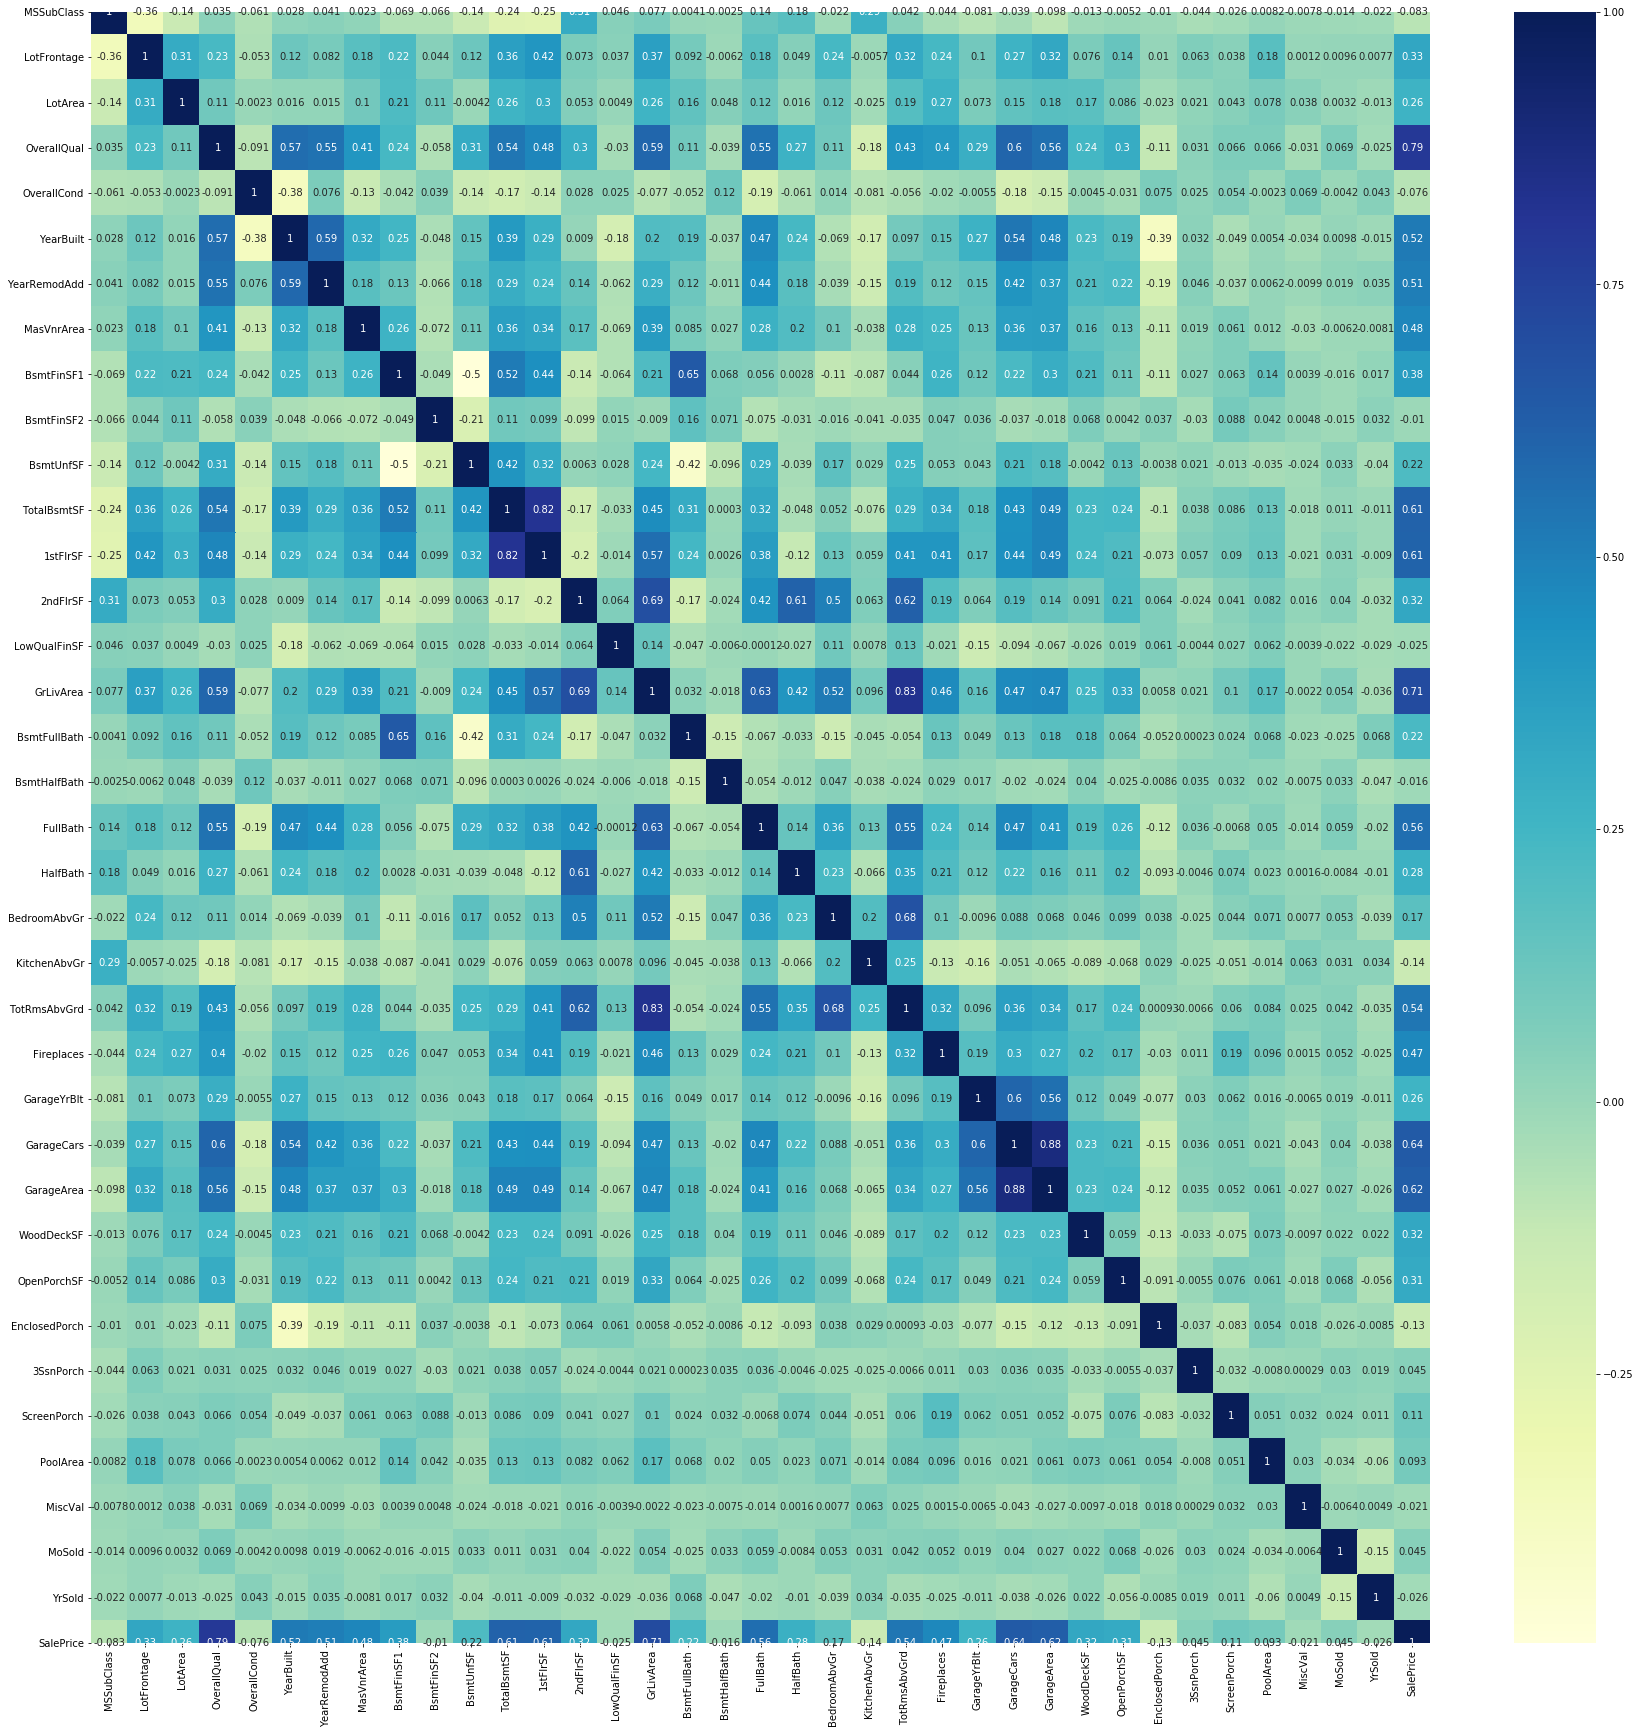

In [23]:
plt.figure(figsize=(30, 30))
sns.heatmap(dropped.corr(), cmap="YlGnBu", annot = True)

**Summary of Correlation Plot**:
1. The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.

In [24]:
#Identifying highly correlated varaibles
corr_matrix = dropped.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [25]:
#So, let's drop these three columns
dropped.drop(df[col_to_drop], axis=1, inplace = True)
dropped.shape

(1451, 73)

In [27]:
sns.pairplot(dropped[list(dropped)])

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000023662E46400> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023662ED51E0> (for post_execute):


KeyboardInterrupt: 

### Derived Features : Age

In [28]:
#Getting the age of the houses
dropped['CurrentYear'] = datetime.datetime.now().year
dropped["Age"] = dropped['CurrentYear'] - dropped['YearBuilt']
dropped.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

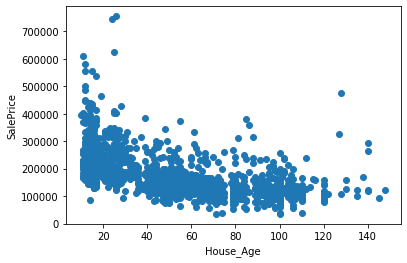

In [29]:
plt.scatter(x=dropped['Age'], y=dropped['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

### Creating Dummy Variables

In [30]:
#regenerating list of numerical and non-numerical columns
CatCols = []
NumCols = []

for col in list(dropped):
    if dropped[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',CatCols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscV

In [31]:
df_dummy = pd.get_dummies(dropped[CatCols], drop_first=True)

In [32]:
# Concating the dataframe of dummy variables with the the original dataframe (dropped)
df_concat = pd.concat([dropped, df_dummy], axis=1)
df_concat.shape

(1451, 283)

In [33]:
# Dropping the original columns from which dummy variables are created
df_processed = df_concat.drop(CatCols, axis = 1)
df_processed.shape

(1451, 244)

### Train-Test Split

In [34]:
X = df_processed.drop('SalePrice', axis=1)
y = df_processed['SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1015, 243)
X_test Shape: (436, 243)
y_train Shape: (1015,)
y_test Shape: (436,)


In [36]:
X_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,30,40.000000,4800,4,7,1990,0.0,197,0,999,1196,0,0,1196,1,0,1,0,2,1,0,1957.0,2,

In [37]:
y_train.head(5)

801     109900
569     135960
1181    392500
808     159950
1095    176432
Name: SalePrice, dtype: int64

### Scaling Numeric Variables using Standard Scaler

In [38]:
scaler = StandardScaler()

In [39]:
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-1.306726,-0.513865,-1.552452,1.293141,0.238209,-0.562965,-0.502945,

In [40]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,1.508340,-1.133355,-0.565062,-0.824292,-0.538734,-0.448532,-0.562965,0.949564,

### Model Building and Evaluation

### Ridge Model Building and Parameter Estimation

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 120, 150, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 120, 150, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017770,0.008154,0.000599,0.000799,0.0001,{'alpha': 0.0001},-24415.793318,-15934.913694,-22061.083085,-21591.857904,-21093.600418,-21019.449684,2785.886069,29,-11375.812534,-12722.528541,-12172.607025,-12369.804282,-11296.692093,-11987.488895,560.725468
1,0.016400,0.002137,0.002892,0.001575,0.001,{'alpha': 0.001},-24409.020314,-15900.577515,-21986.193032,-21502.872914,-21061.136203,-20971.959996,2787.500439,28,-11375.844937,-12717.141348,-12165.272790,-12372.211129,-11294.850963,-11985.064233,559.613662
2,0.013616,0.000949,0.002644,0.001780,0.01,{'alpha': 0.01},-24350.482524,-15827.119179,-21416.946777,-20801.199286,-20887.602815,-20656.670116,2743.029404,26,-11378.321699,-12760.208474,-12170.848779,-12474.206700,-11369.957770,-12030.708685,567.573824
3,0.016871,0.001188,0.000929,0.001859,0.05,{'alpha': 0.05},-24177.857843,-16962.240200,-20271.685931,-20401.906067,-20860.805255,-20534.899059,2290.337231,22,-11410.452162,-13502.768708,-12729.868945,-13183.056663,-12145.728545,-12594.375004,747.400932
4,0.022080,0.006973,0.003518,0.006095,0.1,{'alpha': 0.1},-24021.620819,-17663.036940,-19843.717119,-20456.815378,-21072.225382,-20611.483128,2056.601283,24,-11444.076179,-14115.298208,-13313.137015,-13749.826456,-12821.663152,-13088.800202,929.242723


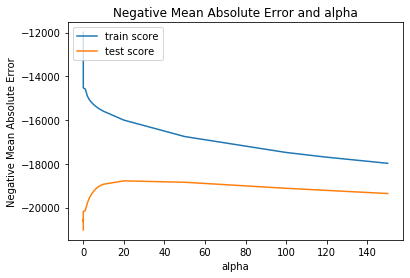

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [90]:
alpha = 10
ridge_10 = Ridge(alpha=alpha)

ridge_10.fit(X_train, y_train)
ridge_10.coef_

array([ -5821.90912767,  -2984.75427543,   4788.42388838,  16288.70820441,
         5325.21892147,   1503.09333696,   3682.77089605,   -807.55974405,
          -75.22101813,    203.84784309,   -670.18902576,   6309.85199393,
         -470.58150344,  23682.43672453,   5075.06616038,   -615.36460287,
         3380.36275339,   2413.7332194 ,    749.59023875,  -2850.34130374,
         4028.58036893,  -1821.92170803,  10980.29453239,   2426.59229227,
         -959.49720354,    767.34822507,   1736.98102912,   1745.35109309,
         1101.01849179,   -882.22936324,    269.64732855,   -460.58002734,
        -2440.0154584 ,   6509.15504687,   4181.84834364,   5928.51011978,
        -1295.21653241,   9428.83067589,   6597.77748531, -12112.5919422 ,
        -1667.33249044,  14079.67214222,   5943.47514747,  14074.57540642,
        -2647.44124153,   6391.44476073,  -7270.88525836,  -4123.07347431,
        -1613.43774307,   5507.75870224,  -4223.29850817,  -2470.15668192,
         1042.14920687,  

In [91]:
alpha = 20
ridge_20 = Ridge(alpha=alpha)

ridge_20.fit(X_train, y_train)
ridge_20.coef_

array([-6.11111393e+03, -2.73945733e+03,  4.46631857e+03,  1.74298873e+04,
        5.52634058e+03,  1.80748055e+03,  4.24589641e+03, -6.53040160e+00,
        6.29061895e+01,  5.57363981e+02,  5.70236707e+02,  6.46176917e+03,
       -3.50470133e+02,  2.17249786e+04,  5.12245658e+03, -6.27092836e+02,
        3.59686964e+03,  2.58145858e+03,  7.28198834e+02, -2.64548990e+03,
        3.82767392e+03, -1.99019272e+03,  1.13713116e+04,  2.61028617e+03,
       -9.90385337e+02,  7.87072638e+02,  1.64320283e+03,  1.88532476e+03,
        9.05245621e+02, -8.85537790e+02,  3.34607650e+02, -4.98712630e+02,
       -2.80203993e+03,  4.28165492e+03,  2.35414499e+03,  4.68903651e+03,
       -3.11812877e+03,  5.55774858e+03,  5.38232474e+03, -8.55004834e+03,
       -1.85133830e+03,  1.00514911e+04,  3.21497200e+03,  1.07727577e+04,
       -1.47945253e+03,  5.77351813e+03, -5.30878744e+03, -1.99012943e+03,
       -1.39522982e+03,  4.62200097e+03, -2.32617163e+03, -1.34197962e+03,
        4.75923999e+02,  

### Lasso Model Building and Parameter Estimation

In [92]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   35.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 120, 150, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [93]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.271465,0.045973,0.001382,0.001722,0.0001,{'alpha': 0.0001},-24330.540199,-13583.575664,-22155.606977,-21622.469036,-21063.139882,-20551.066352,3655.544356,29,-11394.499616,-12786.867091,-12191.593042,-12399.407256,-11296.080435,-12013.689488,579.066547
1,0.272454,0.058256,0.009696,0.007302,0.001,{'alpha': 0.001},-24330.010370,-13583.528472,-22153.668302,-21622.613705,-21062.448802,-20550.453930,3655.271779,28,-11394.482844,-12786.847982,-12191.583728,-12399.384380,-11296.086820,-12013.677151,579.059828
2,0.273726,0.056362,0.000000,0.000000,0.01,{'alpha': 0.01},-24326.297110,-13583.049730,-22134.224505,-21624.116501,-21055.550047,-20544.647579,3652.882344,27,-11394.443947,-12786.733143,-12191.570965,-12399.250797,-11296.268129,-12013.653396,578.973967
3,0.274290,0.057372,0.000000,0.000000,0.05,{'alpha': 0.05},-24321.074220,-13580.904626,-22047.948869,-21618.826774,-21043.561437,-20522.463185,3644.594466,26,-11394.856108,-12786.613431,-12191.780180,-12398.888182,-11297.196323,-12013.866845,578.588420
4,0.290872,0.071945,0.001403,0.001200,0.1,{'alpha': 0.1},-24314.947243,-13578.836985,-21940.185642,-21603.292286,-21035.271344,-20494.506700,3634.118133,25,-11395.510455,-12786.862089,-12192.453851,-12398.680426,-11298.476013,-12014.396567,578.211678


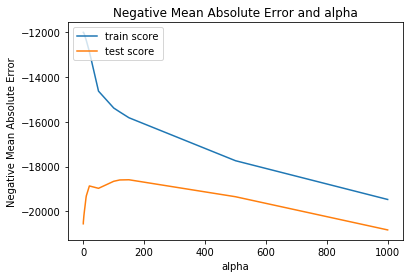

In [94]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [95]:
alpha =100

lasso_100 = Lasso(alpha=alpha)
        
lasso_100.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
lasso_100.coef_

array([-6.42963783e+03, -2.53689627e+03,  5.10466489e+03,  1.56691577e+04,
        5.83891870e+03,  1.44455970e+03,  3.24732848e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.95978533e+02,  3.73747306e+03,
       -8.35565077e+02,  2.72740773e+04,  4.81159963e+03, -2.95393810e+02,
        2.97753319e+03,  1.75426794e+03, -0.00000000e+00, -2.75058603e+03,
        1.63511266e+03, -2.32282398e+03,  1.00708510e+04,  2.08994589e+03,
       -1.43773116e+02,  3.46704089e+02,  1.31281551e+03,  1.67238747e+03,
        5.42248998e+02, -6.81286676e+02,  2.02594049e+02, -3.31236082e+02,
       -4.65303931e+03,  1.22684482e+03,  0.00000000e+00,  2.57462986e+03,
       -3.86554271e+03,  9.95386546e+03,  2.82966804e+03, -2.24905846e+04,
       -1.37878633e+03,  1.20084538e+04,  1.67610727e+03,  1.02853279e+04,
       -0.00000000e+00,  7.94945310e+03, -4.27443928e+03, -0.00000000e+00,
       -0.00000000e+00,  1.66984113e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [51]:
alpha =120

lasso_120 = Lasso(alpha=alpha)
        
lasso_120.fit(X_train, y_train) 
lasso_120.coef_

array([-6.56423226e+03, -2.56431518e+03,  4.95296047e+03,  1.62410741e+04,
        5.91332736e+03,  1.54487207e+03,  3.21241439e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.60513383e+03,
       -6.98283160e+02,  2.68956485e+04,  4.93499010e+03, -2.44131894e+02,
        2.91100844e+03,  1.76860557e+03, -0.00000000e+00, -2.72132954e+03,
        1.79804740e+03, -2.60538605e+03,  1.01583905e+04,  2.22920944e+03,
       -1.36981272e+02,  3.34002822e+02,  1.30630306e+03,  1.73318118e+03,
        4.84795744e+02, -6.80810251e+02,  1.63414860e+02, -3.56566864e+02,
       -5.06613401e+03,  0.00000000e+00,  0.00000000e+00,  1.46152122e+03,
       -4.83008630e+03,  5.24030352e+03,  2.57697316e+03, -1.95478341e+04,
       -1.31460974e+03,  1.09858991e+04,  0.00000000e+00,  9.53061367e+03,
       -0.00000000e+00,  7.69372013e+03, -3.31145357e+03, -0.00000000e+00,
       -0.00000000e+00,  1.13030957e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [52]:
alpha =150

lasso_150 = Lasso(alpha=alpha)
        
lasso_150.fit(X_train, y_train) 
lasso_150.coef_

array([-6.66779160e+03, -2.57225831e+03,  4.66450534e+03,  1.70031549e+04,
        5.92366754e+03,  1.68056569e+03,  3.12520540e+03, -0.00000000e+00,
       -8.44829913e+01,  0.00000000e+00,  0.00000000e+00,  3.17473762e+03,
       -4.86877097e+02,  2.68175306e+04,  5.12366073e+03, -1.68017352e+02,
        2.77873107e+03,  1.72809269e+03, -0.00000000e+00, -2.73899117e+03,
        2.01967085e+03, -2.59525290e+03,  1.03424865e+04,  2.44474241e+03,
       -1.35890270e+02,  3.00730889e+02,  1.27641233e+03,  1.84477799e+03,
        3.79113656e+02, -6.77386305e+02,  1.13025620e+02, -3.55735174e+02,
       -5.62417618e+03,  0.00000000e+00,  0.00000000e+00,  7.69826587e+02,
       -5.28469875e+03,  0.00000000e+00,  2.00342713e+03, -1.48356299e+04,
       -1.22932831e+03,  1.04648357e+04,  0.00000000e+00,  9.24549764e+03,
       -0.00000000e+00,  7.07358708e+03, -1.95608949e+03, -0.00000000e+00,
       -0.00000000e+00,  1.70555841e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

> ### Train Test Scores on All the Models

In [53]:
y_pred_ridge10_train = ridge_10.predict(X_train)
y_pred_lasso100_train = lasso_100.predict(X_train)
y_pred_ridge20_train = ridge_20.predict(X_train)
y_pred_lasso120_train = lasso_120.predict(X_train)
y_pred_lasso150_train = lasso_150.predict(X_train)
print('r2_score in train dataset')
print('r2_score for ridge - alpha 10:', round(r2_score(y_train, y_pred_ridge10_train),2))
print('r2_score for lasso - alpha 100:', round(r2_score(y_train, y_pred_lasso100_train),2))
print('r2_score for ridge - alpha 20:', round(r2_score(y_train, y_pred_ridge20_train),2))
print('r2_score for lasso - alpha 120: ', round(r2_score(y_train, y_pred_lasso120_train),2))
print('r2_score for lasso - alpha 150:', round(r2_score(y_train, y_pred_lasso150_train),2))

r2_score in train dataset
r2_score for ridge - alpha 10: 0.89
r2_score for lasso - alpha 100: 0.9
r2_score for ridge - alpha 20: 0.88
r2_score for lasso - alpha 120:  0.89
r2_score for lasso - alpha 150: 0.89


Error distribution in train dataset


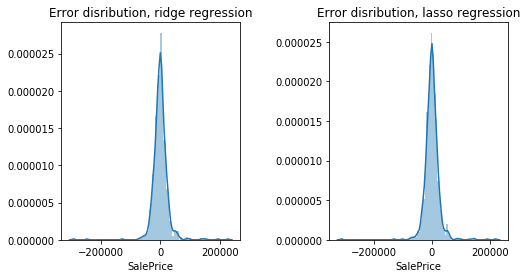

In [54]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge10_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso100_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [55]:
y_pred_ridge10_test = ridge_10.predict(X_test)
y_pred_lasso100_test = lasso_100.predict(X_test)
y_pred_ridge20_test = ridge_20.predict(X_test)
y_pred_lasso120_test = lasso_120.predict(X_test)
y_pred_lasso150_test = lasso_150.predict(X_test)
print('r2_score in test dataset')
print('r2_score for ridge - alpha 10:', round(r2_score(y_test, y_pred_ridge10_test),2))
print('r2_score for lasso - alpha 100:', round(r2_score(y_test, y_pred_lasso100_test),2))
print('r2_score for ridge - alpha 20:', round(r2_score(y_test, y_pred_ridge20_test),2))
print('r2_score for lasso - alpha 120: ', round(r2_score(y_test, y_pred_lasso120_test),2))
print('r2_score for lasso - alpha 150:', round(r2_score(y_test, y_pred_lasso150_test),2))

r2_score in test dataset
r2_score for ridge - alpha 10: 0.87
r2_score for lasso - alpha 100: 0.87
r2_score for ridge - alpha 20: 0.87
r2_score for lasso - alpha 120:  0.87
r2_score for lasso - alpha 150: 0.87


Error distribution in test dataset


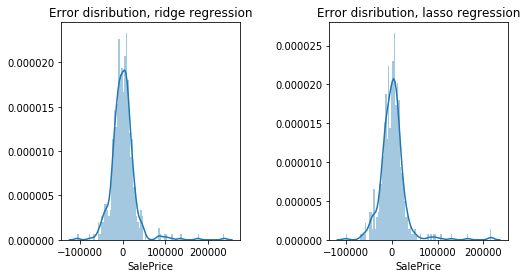

In [56]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge10_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso100_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [57]:
y_pred_ridge_test = ridge_10.predict(X_test)
y_pred_lasso_test = lasso_100.predict(X_test)

In [60]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge10_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso100_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.87


#### Finally, We selected Lasso Model with lambda 100 as the Final Optimal Model for Solving Surprise Housing Problem.
   > Also, The Optimal lambda Value for Ridge Model is 10 but we are not considering this model as the Lasso Model is simpler due to many coefficients of variables being 0 (zero). Thus, making the model more explainable.

In [100]:
#lasso model parameters
model_parameters = list(lasso_100.coef_)
model_parameters.insert(0, lasso_100.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 152085.971),
 ('MSSubClass', -6429.638),
 ('LotFrontage', -2536.896),
 ('LotArea', 5104.665),
 ('OverallQual', 15669.158),
 ('OverallCond', 5838.919),
 ('YearRemodAdd', 1444.56),
 ('MasVnrArea', 3247.328),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', -295.979),
 ('2ndFlrSF', 3737.473),
 ('LowQualFinSF', -835.565),
 ('GrLivArea', 27274.077),
 ('BsmtFullBath', 4811.6),
 ('BsmtHalfBath', -295.394),
 ('FullBath', 2977.533),
 ('HalfBath', 1754.268),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -2750.586),
 ('Fireplaces', 1635.113),
 ('GarageYrBlt', -2322.824),
 ('GarageCars', 10070.851),
 ('WoodDeckSF', 2089.946),
 ('OpenPorchSF', -143.773),
 ('EnclosedPorch', 346.704),
 ('3SsnPorch', 1312.816),
 ('ScreenPorch', 1672.387),
 ('PoolArea', 542.249),
 ('MiscVal', -681.287),
 ('MoSold', 202.594),
 ('YrSold', -331.236),
 ('Age', -4653.039),
 ('MSZoning_FV', 1226.845),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 2574.63),
 ('MSZoning_RM', -3865.543),


### Variables and their Scores which affect the Sale Price of a House.

In [101]:
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
variables = pd.DataFrame(var_coeff)
variables.columns = ['Variable','Score']
variables.sort_values('Score',ascending=False)

,Variable,Score
0,constant,152085.971
66,RoofMatl_WdShngl,35626.014
50,Neighborhood_NoRidge,35007.712
51,Neighborhood_NridgHt,31220.094
11,GrLivArea,27274.077
54,Neighborhood_StoneBr,26292.993
44,Neighborhood_Crawfor,19450.140
71,Exterior2nd_ImStucc,18682.007
65,RoofMatl_CompShg,18131.699
88,BsmtExposure_Gd,17191.998


In [63]:
final_var_list = []
for i in list(dropped):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print("Total Number of Variables not considering Dummy Variables : "+ str(len(final_var_list))+'\n')
print(pd.DataFrame(final_var_list,columns=['Variables']))


Total Number of Variables not considering Dummy Variables : 65

        Variables
0      MSSubClass
1        MSZoning
2     LotFrontage
3         LotArea
4          Street
5        LotShape
6     LandContour
7       LotConfig
8       LandSlope
9    Neighborhood
10     Condition1
11     Condition2
12       BldgType
13     HouseStyle
14    OverallQual
15    OverallCond
16   YearRemodAdd
17      RoofStyle
18       RoofMatl
19    Exterior1st
20    Exterior2nd
21     MasVnrType
22     MasVnrArea
23      ExterQual
24      ExterCond
25     Foundation
26       BsmtQual
27       BsmtCond
28   BsmtExposure
29   BsmtFinType1
30   BsmtFinType2
31    TotalBsmtSF
32        Heating
33      HeatingQC
34     CentralAir
35       2ndFlrSF
36   LowQualFinSF
37      GrLivArea
38   BsmtFullBath
39   BsmtHalfBath
40       FullBath
41       HalfBath
42   KitchenAbvGr
43    KitchenQual
44     Functional
45     Fireplaces
46    FireplaceQu
47     GarageType
48    GarageYrBlt
49   GarageFinish
50     GarageCars


In [64]:
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print("Total Number of Variables having Positive impact on Sale Price : "+ str(len(final_var_pos))+'\n')
print(pd.DataFrame(final_var_pos,columns=['Variables']))

Total Number of Variables having Positive impact on Sale Price : 44

        Variables
0        MSZoning
1         LotArea
2          Street
3        LotShape
4     LandContour
5       LotConfig
6       LandSlope
7    Neighborhood
8      Condition1
9      HouseStyle
10    OverallQual
11    OverallCond
12   YearRemodAdd
13       RoofMatl
14    Exterior1st
15    Exterior2nd
16     MasVnrType
17     MasVnrArea
18     Foundation
19       BsmtCond
20   BsmtExposure
21   BsmtFinType1
22   BsmtFinType2
23     CentralAir
24       2ndFlrSF
25      GrLivArea
26   BsmtFullBath
27       FullBath
28       HalfBath
29     Functional
30     Fireplaces
31    FireplaceQu
32     GarageType
33     GarageCars
34     GarageQual
35     PavedDrive
36     WoodDeckSF
37  EnclosedPorch
38      3SsnPorch
39    ScreenPorch
40       PoolArea
41         MoSold
42       SaleType
43  SaleCondition


In [65]:
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print("Total Number of Variables having Negative impact on Sale Price : "+ str(len(final_var_neg))+'\n')
print(pd.DataFrame(final_var_neg,columns=['Variables']))

Total Number of Variables having Negative impact on Sale Price : 36

       Variables
0     MSSubClass
1       MSZoning
2    LotFrontage
3       LotShape
4      LotConfig
5   Neighborhood
6     Condition1
7     Condition2
8       BldgType
9     HouseStyle
10     RoofStyle
11   Exterior1st
12   Exterior2nd
13     ExterQual
14     ExterCond
15      BsmtQual
16      BsmtCond
17  BsmtExposure
18  BsmtFinType1
19  BsmtFinType2
20   TotalBsmtSF
21       Heating
22     HeatingQC
23  LowQualFinSF
24  BsmtHalfBath
25      HalfBath
26  KitchenAbvGr
27   KitchenQual
28    GarageType
29   GarageYrBlt
30  GarageFinish
31    GarageQual
32   OpenPorchSF
33       MiscVal
34        YrSold
35      SaleType


### Conclusion

1. Optimum value for lambda in <font color='red'>**ridge**</font> regression is <font color='red'>**10**</font>
2. Optimum value for lambda in <font color='red'>**lasso**</font> regression is <font color='red'>**100**</font>
- r2_score in train dataset: r2_score for ridge: **0.89**, r2_score for lasso: **0.90**
- r2_score in test dataset: r2_score for ridge: **0.87**, r2_score for lasso: **0.87**

3. Surprise Housing can use this model to predict the actual price of a property and decide based on the features weather to invest in the property or not.
4. Surprise Housing can use these variables and their scores for purchasing houses by highlighting the negative features of the property and sell the same house by highlghting its positive features to the buyer. Thus making the deal <font color='blue'>**Profitable**</font>.